In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
# Create a simple sample salary dataset
data = {
    'experience': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
    'education_level': ['Bachelors', 'Bachelors', 'Masters', 'Masters', 'PhD', 'PhD', 'PhD', 'Masters', 'Bachelors', 'PhD'],
    'job_title': ['Data Analyst', 'Data Analyst', 'Data Scientist', 'ML Engineer', 'ML Engineer', 'Manager', 'Manager', 'Data Scientist', 'Analyst', 'Manager'],
    'location': ['Delhi', 'Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai', 'Pune', 'Hyderabad', 'Delhi', 'Mumbai'],
    'salary': [40000, 50000, 70000, 90000, 110000, 130000, 150000, 120000, 60000, 160000]
}

df = pd.DataFrame(data)
df.to_csv('salary_data.csv', index=False)

print("✅ Dataset created and saved as 'salary_data.csv'")
df.head()

✅ Dataset created and saved as 'salary_data.csv'


,experience,education_level,job_title,location,salary
0,1,Bachelors,Data Analyst,Delhi,40000
1,3,Bachelors,Data Analyst,Mumbai,50000
2,5,Masters,Data Scientist,Kolkata,70000
3,7,Masters,ML Engineer,Delhi,90000
4,9,PhD,ML Engineer,Bangalore,110000


In [6]:
print("🧹 Checking dataset information:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

print("\n✅ After Encoding:")
df.head()

🧹 Checking dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   experience       10 non-null     int64 
 1   education_level  10 non-null     object
 2   job_title        10 non-null     object
 3   location         10 non-null     object
 4   salary           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes
None

Missing values:
 experience         0
education_level    0
job_title          0
location           0
salary             0
dtype: int64

✅ After Encoding:


,experience,education_level,job_title,location,salary
0,1,0,1,2,40000
1,3,0,1,5,50000
2,5,1,2,4,70000
3,7,1,3,2,90000
4,9,2,3,0,110000


In [14]:
# Separate features (X) and target (y)
X = df.drop('salary', axis=1)
y = df['salary']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split successful!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

✅ Data split successful!
Training samples: 8
Testing samples: 2


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling done!")

✅ Feature scaling done!


In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n📊 Linear Regression Performance:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


📊 Linear Regression Performance:
R² Score: -17.250091980571398
MAE: 15679.963372568556
RMSE: 21360.063190783985


In [11]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_pred_gb = gb.predict(X_test_scaled)

print("\n🌲 Random Forest R²:", r2_score(y_test, y_pred_rf))
print("🔥 Gradient Boosting R²:", r2_score(y_test, y_pred_gb))


🌲 Random Forest R²: -44.7736
🔥 Gradient Boosting R²: -72.87514915659234


In [16]:
voting_reg = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('gb', gb)])
voting_reg.fit(X_train_scaled, y_train)
y_pred_vote = voting_reg.predict(X_test_scaled)

print("\n🤝 Voting Regressor Performance:")
print("R² Score:", r2_score(y_test, y_pred_vote))
print("MAE:", mean_absolute_error(y_test, y_pred_vote))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_vote)))


🤝 Voting Regressor Performance:
R² Score: -40.96415734244383
MAE: 23407.386892340302
RMSE: 32389.87393555424


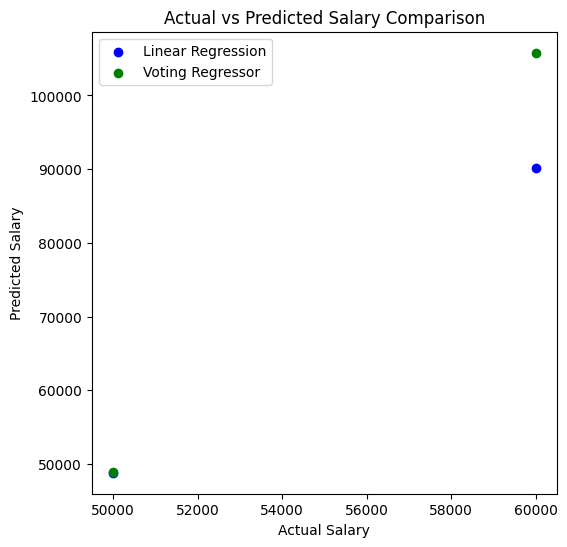


✅ Project Completed Successfully!


In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_vote, color='green', label='Voting Regressor')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary Comparison")
plt.legend()
plt.show()

print("\n✅ Project Completed Successfully!")